In [1]:
!pip install torch_geometric
!git clone https://github.com/blacksilvergeek/gpt_killer/
!pip install mat73


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 16.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=2d62fa6155acbed76df2de1f17c948a9d3d12f4ce100a9af2e1a39c4bcfd0226
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric
Cloning into 'gpt_killer'...
remote: Enumerating objects: 1187, done.
remote: Counting objects: 100% (981/981), done.
remote: Compressing objects: 100% (966/966), done.
remote: Total 1187 (delta 31), reused 938 (delta 13), pack-reused 206
Receiving objects: 100% (1187/1187), 214.78 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (113/113), done.
Updating files: 100% (1075

In [2]:
%cd gpt_killer/Dataset

/content/gpt_killer/Dataset


In [3]:
!pwd

/content/gpt_killer/Dataset


In [4]:
import os
import zipfile
import torch
import torch_geometric
import numpy as np
import mat73
#import torch
from torch.nn.functional import normalize

import networkx as nx
from networkx import from_numpy_array
from torch_geometric.data import Data,Dataset
from torch_geometric.utils import from_networkx
import json
dataset = 'authorshipData.mat' # store the human paper
# here the aim is to convert the text into WAN

import matplotlib.pyplot as plt
from wordcloud import WordCloud


for file in os.listdir():
    if file.endswith(".zip"):
        print("unzipping " + file)
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall()
            print("unzipped " + file)

unzipping response3_WANS.txt.zip
unzipped response3_WANS.txt.zip
unzipping explanation_model2_transfer 2.txt.zip
unzipped explanation_model2_transfer 2.txt.zip
unzipping response4_WANS 3.txt.zip
unzipped response4_WANS 3.txt.zip
unzipping response4_WANS 2.txt.zip
unzipped response4_WANS 2.txt.zip
unzipping explanation_model2_transfer.txt.zip
unzipped explanation_model2_transfer.txt.zip
unzipping graph_dataset.txt.zip
unzipped graph_dataset.txt.zip
unzipping graph_dataset_response.txt.zip
unzipped graph_dataset_response.txt.zip
unzipping response4_WANS.txt.zip
unzipped response4_WANS.txt.zip
unzipping graph_dataset_response_title.txt.zip
unzipped graph_dataset_response_title.txt.zip
unzipping two_original_explanation.zip
unzipped two_original_explanation.zip
unzipping 10_poem.zip
unzipped 10_poem.zip
unzipping response5_WANS.txt.zip
unzipped response5_WANS.txt.zip
unzipping response2_WANS.txt.zip
unzipped response2_WANS.txt.zip
unzipping response_WANS.zip
unzipped response_WANS.zip


In [6]:
import pickle
# pickle load
with open("two_original_explanation",'rb') as f:
    explanation,explanation2  = pickle.load(f)


In [7]:
human_data = mat73.loadmat(dataset)
function_words = [word[0] for word in human_data['function_words']]

In [8]:
def plot_cloud(explanation,num_funcwords=211,function_words = function_words):
    # reshape to 211*-1 and average
    node_mask1 = explanation.node_mask
    node_mask1 = node_mask1.reshape(num_funcwords,-1)
    node_mask1 = node_mask1.sum(axis=1)/node_mask1.shape[1]

    # word cloud for explanation
    wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate_from_frequencies(dict(zip(function_words[0:num_funcwords], node_mask1.tolist())))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


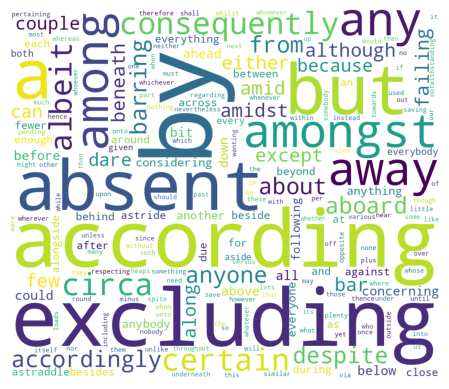

In [9]:
plot_cloud(explanation2)

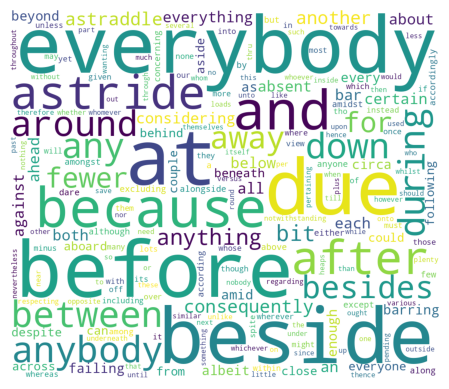

In [10]:
plot_cloud(explanation)

In [11]:
import pickle
url='https://github.com/blacksilvergeek/gpt_killer/blob/zhangmax/Dataset/explanation_model2_transfer.txt'
with open("explanation_model2_transfer.txt",'rb') as f:
    (explanation4_1,explanation4_2,explanation4_3) = pickle.load(f)

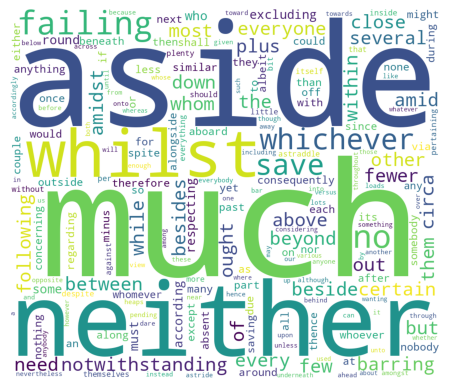

In [12]:
plot_cloud(explanation4_1)

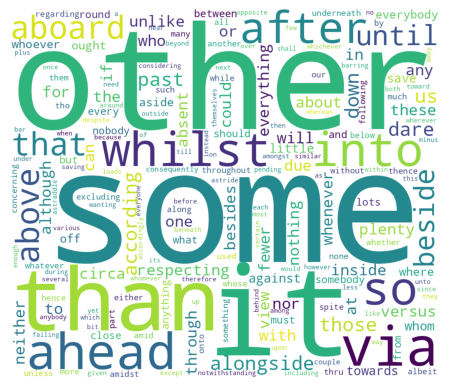

In [13]:
plot_cloud(explanation4_2)

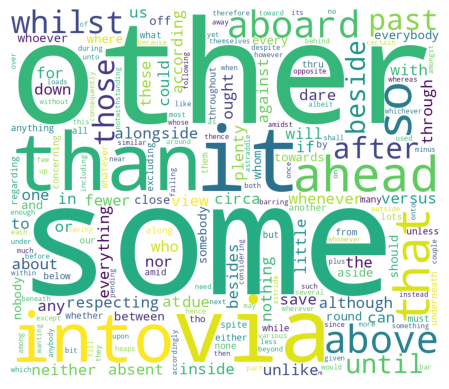

In [14]:
plot_cloud(explanation4_3)